# Tier 2. Module 2: Numerical Programming in Python

## Topic 7 - Bayes theorem. Bayesian inference

## Homework

Using a Naive Bayesian Classifier for Spam Filtering on a Dataset Corresponding to Real Messages.

This will help you consolidate the following skills:

- use of Bayes' theorem in practical tasks of data analysis;
- pre-processing of data for machine learning algorithms.

### Task

#### 1 - Download the Email Spam Classification Dataset


In [ ]:
!wget -O SpamEmailClassificationDataset.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/SpamEmailClassificationDataset.zip?raw=true

#### 2 - Unzip the data file


In [ ]:
!unzip SpamEmailClassificationDataset.zip

#### 3 - Import of specialized libraries for text processing


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords

# Downloading stop words
import nltk

nltk.download("stopwords")
nltk.download("punkt")
stop_words = set(stopwords.words("english"))
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...


True

#### 4 - Read the data


In [5]:
df = pd.read_csv("./src/combined_data.csv")
df.head()

,label,text
0,label,text
1,1,ounce feather bowl hummingbird opec moment ala...
2,1,wulvob get your medircations online qnb ikud v...
3,0,computer connection from cnn com wednesday es...
4,1,university degree obtain a prosperous future m...


The original dataset contains 83,448 records. Therefore, it makes sense to select only a few thousand records for further work.


In [43]:
max_index = 10001
df_slice = df[1:max_index].copy()
df_slice.describe()

,label,text
count,10000,10000
unique,2,10000
top,1,ounce feather bowl hummingbird opec moment ala...
freq,5322,1


#### 5 - Visualize the distribution of messages by two classes in the form of a pie chart


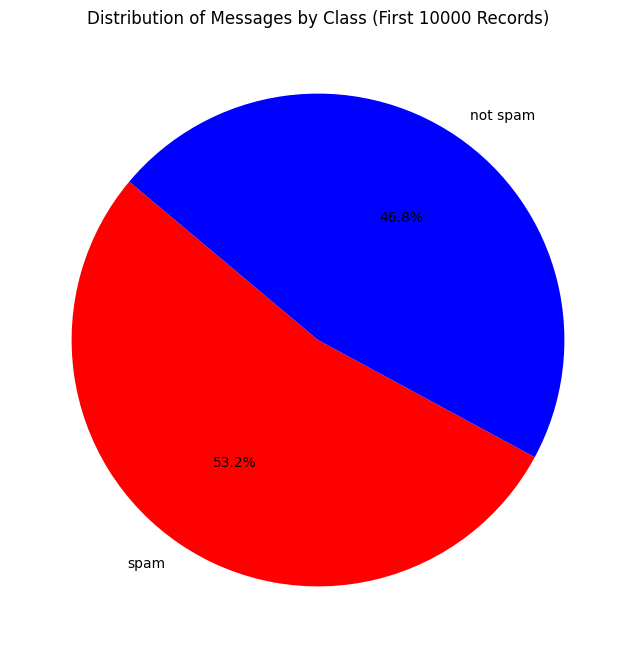

In [44]:
class_counts = df_slice["label"].value_counts()

label_mapping = {"0": "not spam", "1": "spam"}
mapped_labels = [label_mapping[label] for label in class_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(
    class_counts,
    labels=mapped_labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=["red", "blue"],
)
plt.title(f"Distribution of Messages by Class (First {max_index-1} Records)")
plt.show()

#### 6 - Apply the text processing methods of the `nltk` library to convert texts:

- lowercase,
- reduce words to dictionary form,
- remove repeated words in the message.


In [45]:
from nltk.stem import WordNetLemmatizer

corpus = []
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

for document in df_slice["text"]:
    document = re.sub("[^a-zA-Z]", " ", document).lower()
    document = document.split()
    document = [
        lemmatizer.lemmatize(word) for word in document if word not in stop_words
    ]
    document = list(set(document))
    document = " ".join(document)
    corpus.append(document)

df_slice["text"] = corpus
df_slice.head()

,label,text
1,1,heft desperate bowl iambic opec quell afterima...
2,1,cost stopped tablet weight visit ambien brande...
3,0,element lp expands member advanced internet sh...
4,1,prestige sun sunday always position non escape...
5,0,var log john arm wrote bash deletes sparc sour...


#### 7 - Prepare data structures `train_spam`, `train_ham`, `test_emails`, which will contain spam messages for training, ham messages for training and a dictionary of test messages


In [86]:
from sklearn.utils import shuffle

df_shuffled = shuffle(df_slice, random_state=42)

split_ratio = 0.75

df_train = df_shuffled[: int(max_index * split_ratio)].copy()
df_test = df_shuffled[int(max_index * split_ratio) :].copy()

print("Train dataset ->", df_train.shape)
print("Test dataset  ->", df_test.shape)

train_spam = list(df_train[df_train["label"] == "1"].text)
train_ham = list(df_train[df_train["label"] == "0"].text)
test_emails = {
    "spam": list(df_test[df_test["label"] == "1"].text),
    "ham": list(df_test[df_test["label"] == "0"].text),
}

print("Train spam messages:", len(train_spam))
print("Train ham messages: ", len(train_ham))
print("Test spam messages: ", len(test_emails["spam"]))
print("Test ham messages:  ", len(test_emails["ham"]))

Train dataset -> (7500, 2)
Test dataset  -> (2500, 2)
Train spam messages: 3974
Train ham messages:  3526
Test spam messages:  1348
Test ham messages:   1152


#### 8 - Apply the naive Bayes algorithm


##### 8.1 - Vocabulary of unique words that occur in known spam emails

In [87]:
vocab_words_spam = []

for sentence in train_spam:
    sentence_as_list = sentence.split()
    for word in sentence_as_list:
        vocab_words_spam.append(word)

vocab_unique_words_spam = list(set(vocab_words_spam))
len(vocab_unique_words_spam)

44849

##### 8.2 - Determine the probability that each word belongs to spam and apply smoothing

In [88]:
dict_spamicity = {}
for w in vocab_unique_words_spam:
    emails_with_w = 0
    for sentence in train_spam:
        if w in sentence:
            emails_with_w+=1

    total_spam = len(train_spam)
    spamicity = (emails_with_w+1)/(total_spam+2)
    dict_spamicity[w.lower()] = spamicity

len(dict_spamicity)

44849

##### 8.3 - Vocabulary of unique words that occur in known ham emails

In [89]:
vocab_words_ham = []
for sentence in train_ham:
    sentence_as_list = sentence.split()
    for word in sentence_as_list:
        vocab_words_ham.append(word)

vocab_unique_words_ham = list(set(vocab_words_ham))

dict_hamicity = {}
for w in vocab_unique_words_ham:
    emails_with_w = 0
    for sentence in train_ham:
        if w in sentence:
            emails_with_w += 1

    total_ham = len(train_ham)
    Hamicity = (emails_with_w + 1) / (total_ham + 2)  # Smoothing applied
    dict_hamicity[w.lower()] = Hamicity

len(vocab_unique_words_ham)

40559

##### 8.4 - Calculate the probability of spam `P(S)` and an important message `P(H)`

In [90]:
prob_spam = len(train_spam) / (len(train_spam) + (len(train_ham)))
print(prob_spam)

prob_ham = len(train_ham) / (len(train_spam) + (len(train_ham)))
print(prob_ham)

0.5298666666666667
0.47013333333333335


##### 8.5 - For messages without markup (test messages), create a list of words

In [92]:
test_spam_tokenized = []

for sentence in test_emails["spam"]:
    sentence_as_list = sentence.split()
    senten = []
    for word in sentence_as_list:
        senten.append(word)
    test_spam_tokenized.append(senten)

print("Test spam:")
print(len(test_spam_tokenized))
print(test_spam_tokenized[0])

test_ham_tokenized = []

for sentence in test_emails["ham"]:
    sentence_as_list = sentence.split()
    senten = []
    for word in sentence_as_list:
        senten.append(word)
    test_ham_tokenized.append(senten)

print("Test ham:")
print(len(test_ham_tokenized))
print(test_ham_tokenized[0])

Test spam:
1348
['always', 'slender', 'arrangement', 'track', 'kilogrammes', 'nothing', 'period', 'health', 'suddenly', 'achieve', 'click', 'gaiety', 'oprah', 'made', 'horrible', 'ground', 'wide', 'many', 'said', 'work', 'la', 'k', 'result', 'unbreakable', 'check', 'slipping', 'demanded', 'really', 'available', 'weighty', 'www', 'tremendous', 'private', 'disclosed', 'corpulent', 'http', 'vega', 'time', 'become', 'unbelievable', 'thanks', 'escapenumberi', 'take', 'bikini', 'service', 'say', 'since', 'shaking', 'significantly', 'escapelong', 'told', 'even', 'mikkey', 'world', 'pound', 'like', 'thousand', 'worthy', 'opportunity', 'attracting', 'life', 'kilo', 'fortunately', 'product', 'community', 'insanity', 'girl', 'guzzling', 'fat', 'year', 'great', 'long', 'keep', 'would', 'mode', 'sacrifice', 'enjoying', 'right', 'changed', 'worn', 'malke', 'delighted', 'customer', 'waste', 'less', 'revolutionary', 'shown', 'date', 'naturally', 'steadfast', 'extent', 'fox', 'chicago', 'rescued', 'thi

#### 8.6 - Remove words that did not occur in the training data set

In [95]:
reduced_sentences_spam_test = []

for sentence in test_spam_tokenized:
    words_ = []
    for word in sentence:
        if word in vocab_unique_words_spam:
            words_.append(word)
        elif word in vocab_unique_words_ham:
            words_.append(word)
    reduced_sentences_spam_test.append(words_)

print(len(reduced_sentences_spam_test))

reduced_sentences_ham_test = []

for sentence in test_ham_tokenized:
    words_ = []
    for word in sentence:
        if word in vocab_unique_words_ham:
            words_.append(word)
        elif word in vocab_unique_words_spam:
            words_.append(word)
    reduced_sentences_ham_test.append(words_)

print(len(reduced_sentences_ham_test))

1348
1152


##### 8.7 - Removal of non-keywords

In [98]:
non_key = ["us", "the", "of", "your", "a", "i", "you", "for", "u"]

test_spam_stemmed = []

for email in reduced_sentences_spam_test:
    email_stemmed = []
    for word in email:
        if word not in non_key:
            email_stemmed.append(word)
    test_spam_stemmed.append(email_stemmed)

print("Spam:")
print(len(test_spam_stemmed))
print(test_spam_stemmed[0])

test_ham_stemmed = []

for email in reduced_sentences_ham_test:
    email_stemmed = []
    for word in email:
        if word not in non_key:
            email_stemmed.append(word)
    test_ham_stemmed.append(email_stemmed)

print("Ham:")
print(len(test_ham_stemmed))
print(test_ham_stemmed[0])

Spam:
1348
['always', 'slender', 'arrangement', 'track', 'kilogrammes', 'nothing', 'period', 'health', 'suddenly', 'achieve', 'click', 'gaiety', 'oprah', 'made', 'horrible', 'ground', 'wide', 'many', 'said', 'work', 'la', 'k', 'result', 'unbreakable', 'check', 'slipping', 'demanded', 'really', 'available', 'weighty', 'www', 'tremendous', 'private', 'disclosed', 'corpulent', 'http', 'vega', 'time', 'become', 'unbelievable', 'thanks', 'escapenumberi', 'take', 'bikini', 'service', 'say', 'since', 'shaking', 'significantly', 'escapelong', 'told', 'even', 'mikkey', 'world', 'pound', 'like', 'thousand', 'worthy', 'opportunity', 'attracting', 'life', 'kilo', 'fortunately', 'product', 'community', 'insanity', 'girl', 'guzzling', 'fat', 'year', 'great', 'long', 'keep', 'would', 'mode', 'sacrifice', 'enjoying', 'right', 'changed', 'worn', 'delighted', 'customer', 'waste', 'less', 'revolutionary', 'shown', 'date', 'naturally', 'steadfast', 'extent', 'fox', 'chicago', 'rescued', 'thing', 'thinner'

##### 8.8 - Naive Bayes classifier

In [110]:
def mult(list_):  # function to multiply all word probs together
    total_prob = 1
    for i in list_:
        total_prob = total_prob * i
    return total_prob


def Bayes(email):
    probs_s = []
    probs_h = []
    Pr_S = prob_spam
    Pr_H = prob_ham

    for word in email:

        try:
            pr_WS = dict_spamicity[word]
        except KeyError:
            # Apply smoothing for word not seen in spam training data, but seen in ham training
            pr_WS = 1 / (total_spam + 2)

        try:
            pr_WH = dict_hamicity[word]
        except KeyError:
            # Apply smoothing for word not seen in ham training data, but seen in spam training
            pr_WH = 1 / (total_ham + 2)

        prob_word_is_spam_BAYES = pr_WS
        prob_word_is_ham_BAYES = pr_WH

        probs_s.append(prob_word_is_spam_BAYES)
        probs_h.append(prob_word_is_ham_BAYES)

    try:
        final_classification = (
            Pr_S * mult(probs_s) / ((Pr_S * mult(probs_s)) + (Pr_H * mult(probs_h)))
        )
    except ZeroDivisionError:
        final_classification = 1

    return final_classification

In [113]:
test_spam_results = []

for email in test_spam_stemmed:
    classification = Bayes(email)
    test_spam_results.append(classification)

print(len(test_spam_results))

test_ham_results = []

for email in test_ham_stemmed:
    classification = Bayes(email)
    test_ham_results.append(classification)

print(len(test_ham_results))

1348
1152


#### 9 - Analyze the quality of the constructed classifier

In [120]:
actual_labels = [*[1] * len(test_spam_results), *[0] * len(test_ham_results)]
print(len(actual_labels))

predicted_probs = [*test_spam_results, *test_ham_results]
print(len(predicted_probs))

2500
2500


In [121]:
from sklearn.metrics import confusion_matrix

predicted_labels = [1 if prob >= 0.5 else 0 for prob in predicted_probs]

cm = confusion_matrix(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1069   83]
 [ 304 1044]]


In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy = accuracy_score(actual_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(actual_labels, predicted_labels)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(actual_labels, predicted_labels)
print(f"Recall: {recall:.2f}")

# F1-score
f1 = f1_score(actual_labels, predicted_labels)
print(f"F1-Score: {f1:.2f}")

# Classification report
report = classification_report(actual_labels, predicted_labels)
print("\nClassification Report:\n", report)

Accuracy: 0.85
Precision: 0.93
Recall: 0.77
F1-Score: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85      1152
           1       0.93      0.77      0.84      1348

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.86      0.85      0.85      2500



The words most likely to be found in spam

In [93]:
n_samples = 20

sorted_dict_spamicity = sorted(
    dict_spamicity.items(), key=lambda item: item[1], reverse=True
)[:n_samples]

for word, freq in sorted_dict_spamicity:
    print(f"{word}: {freq}")

e: 0.9969818913480886
n: 0.9934607645875252
r: 0.9934607645875252
s: 0.9911971830985915
o: 0.9909456740442656
t: 0.9906941649899397
c: 0.988682092555332
l: 0.988682092555332
p: 0.9836519114688129
m: 0.9836519114688129
u: 0.9781187122736419
g: 0.9730885311871227
h: 0.9710764587525151
d: 0.9652917505030181
b: 0.9529678068410463
er: 0.9519617706237424
y: 0.932092555331992
v: 0.9270623742454729
en: 0.9265593561368209
es: 0.9149899396378269


The words longer than 2 characters that most likely to be found in spam 

In [94]:
n_samples = 20

sorted_dict_spamicity = sorted(
    dict_spamicity.items(), key=lambda item: item[1], reverse=True
)

counter = 0
for word, freq in sorted_dict_spamicity:
    if len(word) > 2:
        print(f"{word}: {freq}")
        counter += 1
        if counter == n_samples:
            break

ing: 0.7698692152917505
ion: 0.6901408450704225
ber: 0.6524144869215291
ent: 0.6498993963782697
pen: 0.6463782696177063
tion: 0.630533199195171
mbe: 0.6232394366197183
mber: 0.6204728370221329
com: 0.5953219315895373
ter: 0.5865191146881288
ape: 0.5809859154929577
pro: 0.5809859154929577
cap: 0.5807344064386318
num: 0.5764587525150905
umber: 0.5709255533199196
numb: 0.5696680080482898
numbe: 0.5689134808853119
number: 0.5689134808853119
est: 0.5666498993963782
ati: 0.5487927565392354


### Conclusion:

This spam detection model, built on the naive Bayes algorithm, showed a fairly good accuracy of about 85% on the Email Spam Classification Dataset. The model detected 93% of spam messages, but did a worse job of recognizing ham messages, only 78% were interpreted correctly. That is, the model has a tendency to send normal messages to spam.

It is interesting to note that the most spammy words are words consisting of one or two letters. This can be explained by the fact that attackers, in an attempt to bypass spam detection algorithms, write messages with errors or replace certain letters with special characters so that the algorithm does not recognize a spam word. Thus, after tokenization, one word can be split into several parts, which is why a large number of one-letter tokens appear in spam messages after processing. Their presence in itself is already a sign of possible spam.